In [1]:
%load_ext autoreload
%autoreload 2

In [34]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

In [47]:
slist = np.array(glob.glob('../figures/exploration/line_fits/fit_*txt'))
indices = np.array([ os.path.basename(x).split('.')[0].split('fit_')[1] for x in slist])

In [59]:
linebloc[np.in1d(indices, 'straitjackets_landlady'),0, 4]

array([2.02453932])

In [9]:
linebloc = np.zeros([len(slist), 3, 7])
for findex, filename in enumerate(slist):
    arr = np.genfromtxt(filename)
    linebloc[findex] = arr

In [21]:
ew = linebloc[:,:,0] / linebloc[:,:,1]
snr = linebloc[:,:,2] / linebloc[:,:,6]

In [71]:
realdet = (snr[:,0]>1.)&(linebloc[:,0,4]>2.)&(ew[:,0]>0.)

In [77]:
realdet.sum()

5

In [72]:
linebloc[realdet,0,4]

array([2.79229606, 2.40838313, 2.31155378, 2.52025353, 2.02453932])

In [73]:
linebloc[realdet,-1,4]# - linebloc[realdet,0,4]

array([2.04967138, 2.1921812 , 1.50695416, 1.95147706, 2.00815782])

In [76]:
' '.join([ os.path.basename(x).replace('.txt','.png') for x in slist[realdet]])

'fit_sterner_inoculated.png fit_perspicuous_grownup.png fit_harshly_punctually.png fit_patchup_excused.png fit_straitjackets_landlady.png'

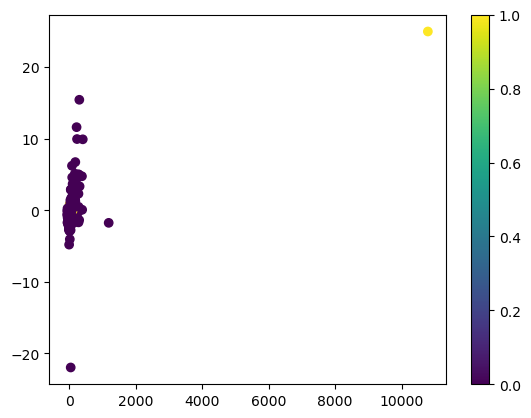

In [67]:
plt.scatter ( linebloc[:,0,0], linebloc[:,0,4] - linebloc[:,-1,4], c=realdet)

plt.colorbar()